### What are lambda functions in Python?

In Python, an anonymous function is a function that is defined without a name.

While normal functions are defined using the def keyword in Python, anonymous functions are defined using the lambda keyword.

Hence, anonymous functions are also called lambda functions.


<b>Syntax of Lambda Function in python</b><br>
```lambda arguments: expression```

In [1]:
# use of lambda functions - Example 1
double = lambda x: x * 2

print(double(5))

10


In [3]:
# use of lambda functions - Example 2
add_square = lambda x,y: x**2+y**2

print(add_square(2,3))

13


## Map function

<b>Basic Syntax</b><br>
```map(function_object, iterable1, iterable2,...)```

In [4]:
# Example 1

def multiply2(x):
  return x * 2
    
map(multiply2, [1, 2, 3, 4])  # Output [2, 4, 6, 8]

In [5]:
# Example 2

map(lambda x : x*2, [1, 2, 3, 4]) #Output [2, 4, 6, 8]


In [9]:
# Example 3

dict_a = [{'name': 'python', 'points': 10}, {'name': 'java', 'points': 8}]
  
print(list(map(lambda x : x['name'], dict_a)))
  
print(list(map(lambda x : x['points']*10,  dict_a)))

print(list(map(lambda x : x['name'] == "python", dict_a)))


['python', 'java']
[100, 80]
[True, False]


In [15]:
# Example 4

list_a = [1, 2, 3]
list_b = [10, 20, 30]
  
print(list(map(lambda x, y: x + y, list_a, list_b)))

[11, 22, 33]


## Filter function

<b>Basic Syntax</b><br>
```filter(function_object, iterable1, iterable2,...)```

In [17]:
# Example 1

a = [1, 2, 3, 4, 5, 6]
filter(lambda x : x % 2 == 0, a)

In [18]:
# Example 2

dict_a = [{'name': 'python', 'points': 10}, {'name': 'java', 'points': 8}, {'name': 'python', 'points': 10}]

filter(lambda x : x['name'] == 'python', dict_a)

## Comprehensions

#### Dictionary Comprehensions

In [22]:
# Example 1 

old_price = {'milk': 1.02, 'coffee': 2.5, 'bread': 2.5}

dollar_to_pound = 0.76
new_price = {item: value*dollar_to_pound for (item, value) in old_price.items()}
print(new_price)


{'milk': 0.7752, 'coffee': 1.9, 'bread': 1.9}


In [23]:
# Example 2 - with if condition

original_dict = {'jack': 38, 'michael': 48, 'guido': 57, 'john': 33}

new_dict = {k: v for (k, v) in original_dict.items() if v % 2 != 0 if v < 40}
print(new_dict)

{'john': 33}


In [24]:
# Example 3 - with if else

original_dict = {'jack': 38, 'michael': 48, 'guido': 57, 'john': 33}

new_dict_1 = {k: ('old' if v > 40 else 'young')
    for (k, v) in original_dict.items()}
print(new_dict_1)

{'jack': 'young', 'michael': 'old', 'guido': 'old', 'john': 'young'}


In [25]:
# Example 4 - nested dictionary comprehensions

dictionary = {
    k1: {k2: k1 * k2 for k2 in range(1, 6)} for k1 in range(2, 5)
}
print(dictionary)

{2: {1: 2, 2: 4, 3: 6, 4: 8, 5: 10}, 3: {1: 3, 2: 6, 3: 9, 4: 12, 5: 15}, 4: {1: 4, 2: 8, 3: 12, 4: 16, 5: 20}}


#### Set Comprehensions

In [29]:
# Example

names = [ 'Arnold', 'BILL', 'alice', 'arnold', 'MARY', 'J', 'BIll' ,'maRy']
res = {name.capitalize() for name in names if len(name) > 1}
res

{'Alice', 'Arnold', 'Bill', 'Mary'}

## Global, Local and Nonlocal

### Variable Scoping

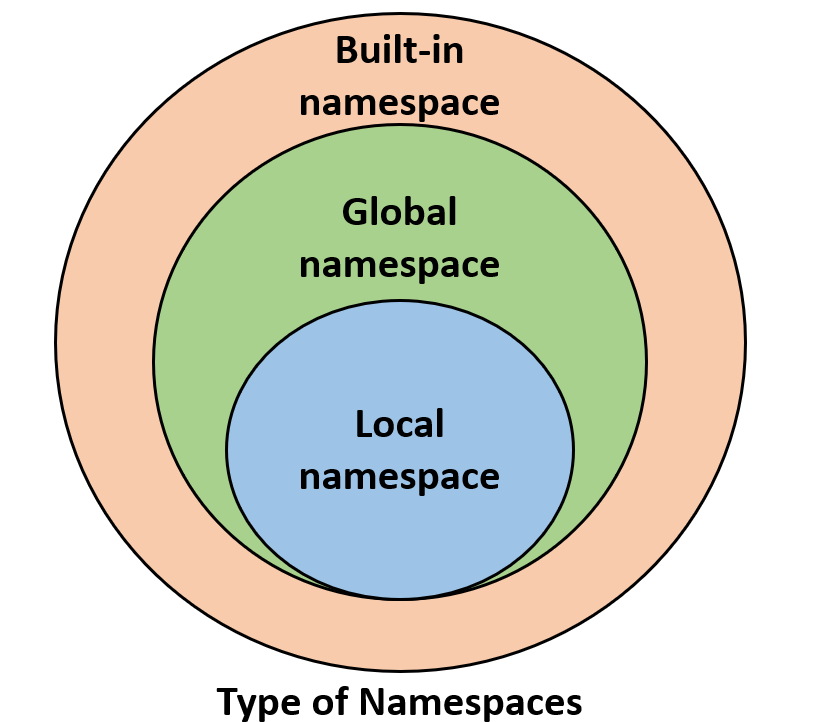

<b>Global Variables</b><br>
In Python, a variable declared outside of the function or in global scope is known as a global variable. This means that a global variable can be accessed inside or outside of the function.

In [6]:
# example 1

x = "global"

def foo():
    print("x inside:", x)


foo()
print("x outside:", x)

x inside: global
x outside: global


In [12]:
# Example 2

x = 5

def foo():
    x = 5
    x = x * 2
    print(x)

foo()

10


In [13]:
# Example 3

x = 10
def foobar():
    global x
    print(x)
    x += 1
    print(x)

foobar()
print(x)

10
11
11


<b>Rules of global Keyword</b><br>
The basic rules for global keyword in Python are:<br>

- When we create a variable inside a function, it is local by default.<br>
- When we define a variable outside of a function, it is global by default. You don't have to use global keyword.<br>
- We use global keyword to read and write a global variable inside a function.<br>
- Use of global keyword outside a function has no effect.<br>

In [19]:
# global keyword in nested functions

def foo():
    d = 20

    def bar():
        global d
        d +=1
        print(d)
    
    print("Before calling bar: ", d)
    print("Calling bar now")
    bar()
    print("After calling bar: ", d)

foo()

# print("x in main: ", d)

Before calling bar:  20
Calling bar now


NameError: name 'd' is not defined

## Understanding nonlocal variable

Nonlocal variables are used in nested functions whose local scope is not defined. This means that the variable can be neither in the local nor the global scope.

In [1]:
gv = "Some value" # global variable

def func():
    lv = "Some local value" # local variable
    def nested_func():
        global gv
        gv += " + Something else"
        print(gv)
        nonlocal lv
        lv += " + Something else"
        print(lv)
    nested_func()
    
func()

Some value + Something else
Some local value + Something else


In [20]:
# Using nonlocal we can't change global scope variables

gv = "Some value" # global variable

def func():
    lv = "Some local value" # local variable
    def nested_func():
        nonlocal gv
        gv += " + Something else"
        print(gv)
        nonlocal lv
        lv += " + Something else"
        print(lv)
    nested_func()
    
func()

SyntaxError: no binding for nonlocal 'gv' found (<ipython-input-20-7ead7eea11dd>, line 8)

### Automation Ideas using Python

- Write a CLI to check COVID-19 cases on terminal
- Write a CLI to check weather details on terminal
- Automate the clutter in your Download/Desktop folder
- Write a Script to keep your mouse moving (#WFH hack :D)
- Write a watcher script to check for item with less price [to be picked later]